#                   Ames Housing Prices Analysis 
## Table of contents
* <a href='#1'>Introduction and Project Overview
* <a href='#2'>Code Section</a>
    * <a href='#1.1'>Raw Data Processing and cleaning</a>
    * <a href='#1.2'>Continuous Variables</a>
    * <a href='#1.3'>Categorical Variables</a>
    * <a href='#1.4'>Linear Regression Analysis</a>
* <a href='#3'>Summary and Conclusion

<a id='1'></a>

## **Introduction and Project Overview**
All home buyer won’t probably begin describing their dream house with the height of the basement ceiling or the proximity to an east-west railroad. But this data analysis proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

Data source is from: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

<a id='1.1'></a>

## Raw Data Processing and cleaning

***

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer


In [2]:
#df = pd.read_csv("test.csv")
import xlrd
test=pd.read_excel("test.xlsx")
train=pd.read_excel("train.xlsx")
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# test.info()
# test.head()

In [ ]:
#test.isna().sum().sort_values(ascending=False)[1:45]

In [3]:
train.isna().sum().sort_values(ascending=False)[1:45]

MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
dtype: int64

In [4]:
#treat missing values, categorize non numeric value

# from sklearn.preprocessing import OrdinalEncoder
# ord_enc = OrdinalEncoder()
# df["OWNERSHIP_cat"] = ord_enc.fit_transform(df[["OWNERSHIP"]])
# pd.set_option('display.max_rows', df.shape[0]+1)
# print(df['OWNERSHIP_cat'] == 9)

# Since this column is categorical columns but has numerical values.so fill this values with most frequent value
train['LotFrontage'].fillna(train["LotFrontage"].value_counts().to_frame().index[0], inplace=True)
test['LotFrontage'].fillna(test["LotFrontage"].value_counts().to_frame().index[0], inplace=True)

#drop cols if GarageType is na- no garage

# for col in ['GarageQual','GarageFinish','GarageYrBlt','GarageType','GarageCond']:
#     train[col]=train.dropna(how = 'all')
#     test[col]=test.dropna(how = 'all')
    
# for col in ['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure']:
#     train[col]=train.dropna(how = 'all')
#     test[col]=test.dropna(how = 'all')
train['GarageYrBlt'].fillna(0,inplace=True)

# fill everything with NA, 'None' 
for col in ['Alley','FireplaceQu','Fence','PoolQC','GarageQual','GarageFinish','GarageType','GarageCond','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure']:
    train[col].fillna('None', inplace=True)
    test[col].fillna('None', inplace=True)
    
# fill everything with NA, 'None' 
for col in ['MasVnrType','MiscFeature']:
    train[col].fillna('None', inplace=True)

# maximum value has 'SBrkr' category.so fillna with 'SBrkr'.
train['Electrical'].value_counts()
train['Electrical'].fillna('SBrkr',inplace=True)

# fill na with median of certain type?
train[train['MasVnrType'].isna()][['SalePrice','MasVnrType','MasVnrArea']]

#train['MasVnrArea'].fillna(181000,inplace=True)
#test['MasVnrArea'].fillna(181000,inplace=True)

train['MasVnrArea'].fillna(0,inplace=True)


#numerical and categorical for just col with missing val
#numericalna=['GarageCars','GarageArea','TotalBsmtSF','BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath']
categoricalna = ['KitchenQual','Exterior1st','SaleType','Exterior2nd','Functional','Utilities','MSZoning']

# fill NaN as median value for numericalna columns
#imputer = SimpleImputer(strategy='median')
#imputer.fit(test[numerical] + train[numerical])
#test[numerical] = imputer.transform(test[numerical])
#train[numericalna] = imputer.transform(train[numericalna])

# fill NaN with most frequent value of the column for categoricalna columns
for i in categoricalna:
    train[i].fillna(train[i].value_counts().to_frame().index[0], inplace=True)
    #test[i].fillna(test[i].value_counts().to_frame().index[0], inplace=True) 

#train['GarageQual']=train.dropna(how = 'all')


#for col in categorical:
#    train[categorical]=train[categorical].astype('category').cat.codes
    #test[col]=test[col].astype('category').cat.codes

# df["MSZoning"] = df["MSZoning"].astype('category').cat.codes
# df["Street"] = df["Street"].astype('category').cat.codes
# df["Alley"] = df["Alley"].astype('category').cat.codes
# df["LotShape"] = df["LotShape"].astype('category').cat.codes
# df["SaleCondition"] = df["SaleCondition"].astype('category').cat.codes



train.isna().sum().sort_values(ascending=False)[1:20]

CentralAir      0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
GarageFinish    0
dtype: int64

In [5]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:ylabel='SalePrice'>

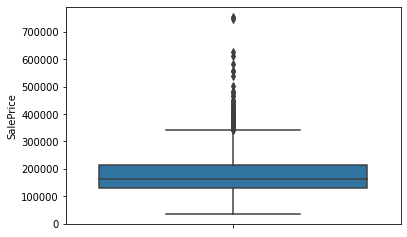

In [6]:
import seaborn as sns
sns.boxplot(y='SalePrice',data=train)

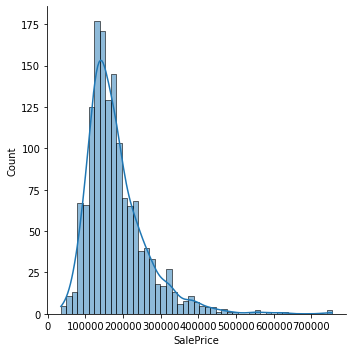

In [12]:
sns.displot(train['SalePrice'],kde=True)

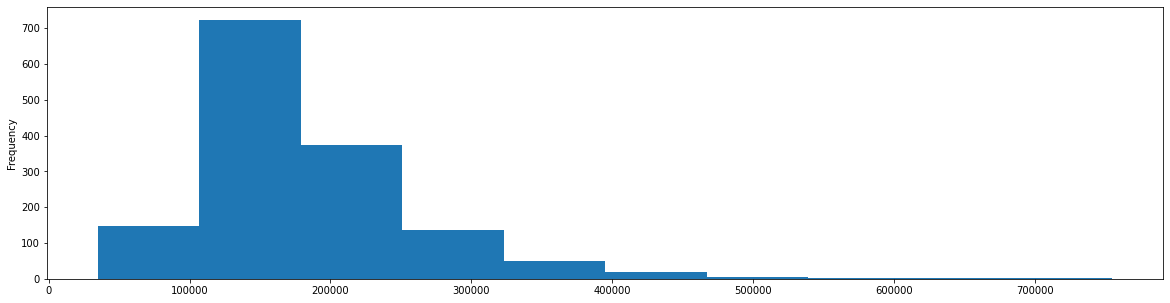

In [13]:
train['SalePrice'].plot(kind='hist',figsize=(20,5))
plt.savefig('sale.png',bbox_inches='tight',dpi=600)

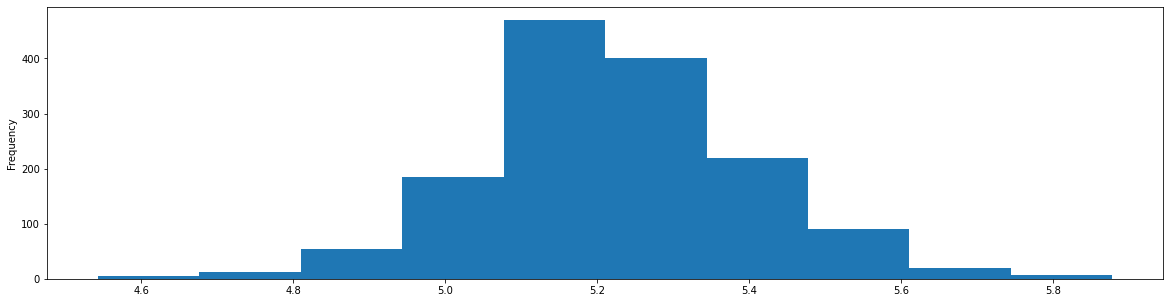

In [14]:
np.log10(train['SalePrice']).plot(kind='hist',figsize=(20,5))
plt.savefig('sale.png',bbox_inches='tight',dpi=600)

In [15]:
# numerical and categorical for all col
categorical=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition','BsmtFullBath','BsmtHalfBath','FullBath','Fireplaces','HalfBath']
numerical=['Id','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']

<a id='1.2'></a>
***

## **Continous Variables**

In [16]:
corr=train[numerical].corr()['SalePrice'].sort_values(ascending=False)
#corr.style.background_gradient(cmap='coolwarm')
#corr_s=pd.series(data=corr)
corr_df=corr.to_frame()
#corr_df=corr.to_frame().index
corr_df

,SalePrice
SalePrice,1.000000
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.472614


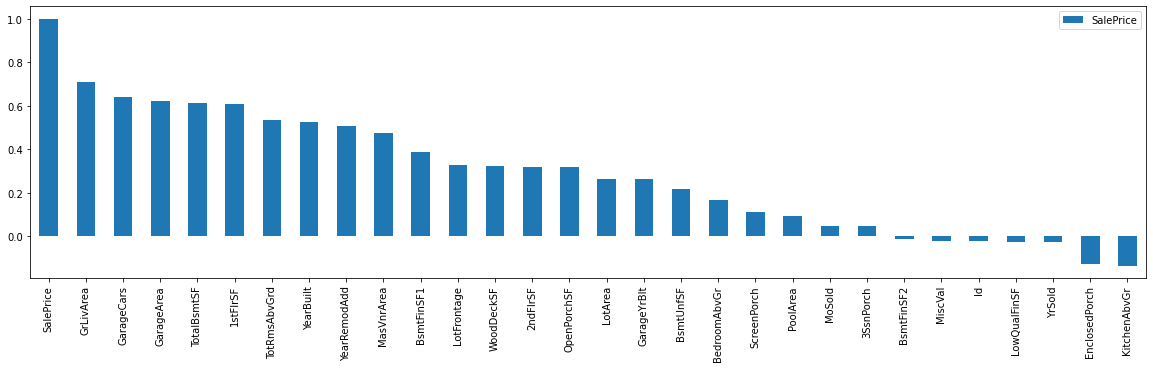

In [17]:
corr_df.plot(kind='bar',figsize=(20,5))
plt.savefig('corrdf2.png',bbox_inches='tight',dpi=600)

In [18]:
corr=train[numerical].corr().sort_values('SalePrice',ascending=False)
corr.style.background_gradient(cmap='coolwarm')


,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,0.329220,0.263843,0.522897,0.507101,0.472614,0.386420,-0.011378,0.214479,0.613581,0.605852,0.319334,-0.025606,0.708624,0.168213,-0.135907,0.533723,0.261366,0.640409,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
GrLivArea,0.008273,0.359866,0.263116,0.199010,0.287389,0.388052,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,0.134683,1.000000,0.521270,0.100063,0.825489,0.162543,0.467247,0.468997,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,0.264353,0.154871,0.537850,0.420622,0.361945,0.224054,-0.038264,0.214175,0.434585,0.439317,0.183926,-0.094480,0.467247,0.086106,-0.050634,0.362289,0.598005,1.000000,0.882475,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,0.317925,0.180403,0.478954,0.371600,0.370884,0.296970,-0.018227,0.183303,0.486665,0.489782,0.138347,-0.067601,0.468997,0.065253,-0.064433,0.337822,0.560783,0.882475,1.000000,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,0.359606,0.260833,0.391452,0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.050450,-0.068901,0.285573,0.176359,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,0.404099,0.299475,0.281986,0.240379,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.127401,0.068101,0.409516,0.166642,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
TotRmsAbvGrd,0.027239,0.319389,0.190015,0.095589,0.191740,0.279568,0.044316,-0.035227,0.250647,0.285573,0.409516,0.616423,0.131185,0.825489,0.676620,0.256045,1.000000,0.095607,0.362289,0.337822,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,-0.012713,0.107427,0.014228,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,-0.070651,-0.174800,0.095589,0.272029,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.087325,0.013788,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,-0.040581,-0.149598,0.191740,0.146357,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.174146,0.103321,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.102775,-0.038450,0.279568,0.132696,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614


In [19]:
newnumerical=['SalePrice','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea']


In [20]:
corr=train[newnumerical].corr().sort_values('SalePrice',ascending=False)
corr.style.background_gradient(cmap='coolwarm')

,SalePrice,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,LotArea
SalePrice,1.000000,0.708624,0.640409,0.623431,0.613581,0.605852,0.533723,0.522897,0.507101,0.472614,0.386420,0.329220,0.324413,0.319334,0.315856,0.263843
GrLivArea,0.708624,1.000000,0.467247,0.468997,0.454868,0.566024,0.825489,0.199010,0.287389,0.388052,0.208171,0.359866,0.247433,0.687501,0.330224,0.263116
GarageCars,0.640409,0.467247,1.000000,0.882475,0.434585,0.439317,0.362289,0.537850,0.420622,0.361945,0.224054,0.264353,0.226342,0.183926,0.213569,0.154871
GarageArea,0.623431,0.468997,0.882475,1.000000,0.486665,0.489782,0.337822,0.478954,0.371600,0.370884,0.296970,0.317925,0.224666,0.138347,0.241435,0.180403
TotalBsmtSF,0.613581,0.454868,0.434585,0.486665,1.000000,0.819530,0.285573,0.391452,0.291066,0.360067,0.522396,0.359606,0.232019,-0.174512,0.247264,0.260833
1stFlrSF,0.605852,0.566024,0.439317,0.489782,0.819530,1.000000,0.409516,0.281986,0.240379,0.339850,0.445863,0.404099,0.235459,-0.202646,0.211671,0.299475
TotRmsAbvGrd,0.533723,0.825489,0.362289,0.337822,0.285573,0.409516,1.000000,0.095589,0.191740,0.279568,0.044316,0.319389,0.165984,0.616423,0.234192,0.190015
YearBuilt,0.522897,0.199010,0.537850,0.478954,0.391452,0.281986,0.095589,1.000000,0.592855,0.311600,0.249503,0.107427,0.224880,0.010308,0.188686,0.014228
YearRemodAdd,0.507101,0.287389,0.420622,0.371600,0.291066,0.240379,0.191740,0.592855,1.000000,0.176529,0.128451,0.087325,0.205726,0.140024,0.226298,0.013788
MasVnrArea,0.472614,0.388052,0.361945,0.370884,0.360067,0.339850,0.279568,0.311600,0.176529,1.000000,0.261256,0.174146,0.159991,0.173800,0.122528,0.103321


In [21]:
train.isna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


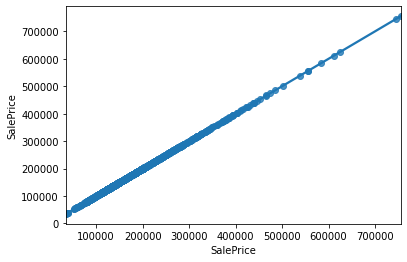

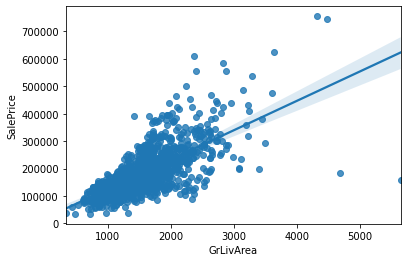

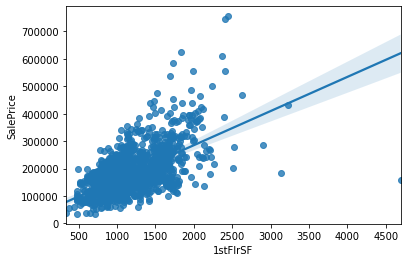

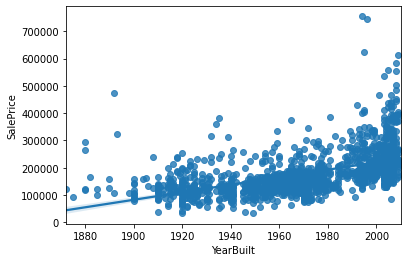

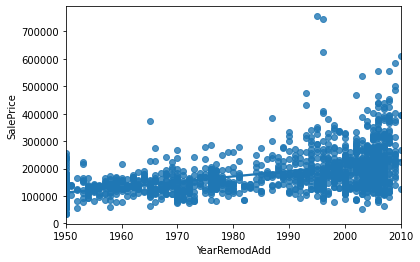

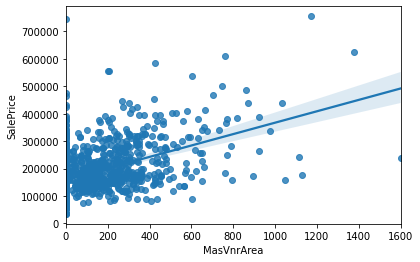

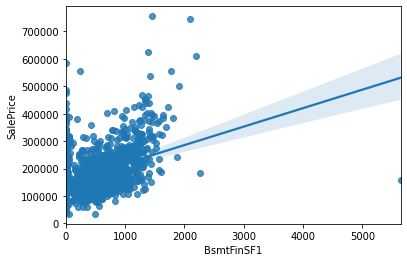

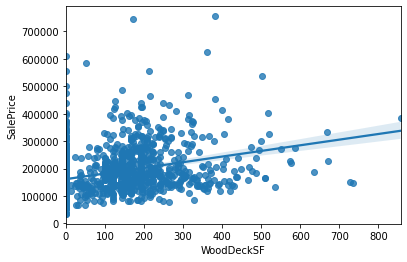

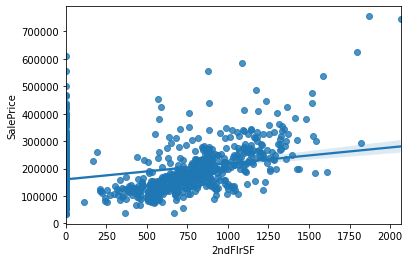

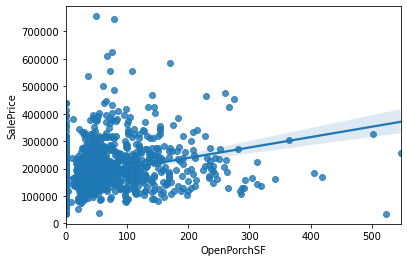

In [23]:
newnumerical=['SalePrice','GrLivArea','1stFlrSF','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','WoodDeckSF','2ndFlrSF','OpenPorchSF']

#regression model
for i in newnumerical:
    sns.regplot(x=i, y='SalePrice',data=train)
    plt.show()
    

In [24]:
corr=train[newnumerical].corr().sort_values('SalePrice',ascending=False)
corr.style.background_gradient(cmap='coolwarm')

,SalePrice,GrLivArea,1stFlrSF,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF
SalePrice,1.000000,0.708624,0.605852,0.522897,0.507101,0.472614,0.386420,0.324413,0.319334,0.315856
GrLivArea,0.708624,1.000000,0.566024,0.199010,0.287389,0.388052,0.208171,0.247433,0.687501,0.330224
1stFlrSF,0.605852,0.566024,1.000000,0.281986,0.240379,0.339850,0.445863,0.235459,-0.202646,0.211671
YearBuilt,0.522897,0.199010,0.281986,1.000000,0.592855,0.311600,0.249503,0.224880,0.010308,0.188686
YearRemodAdd,0.507101,0.287389,0.240379,0.592855,1.000000,0.176529,0.128451,0.205726,0.140024,0.226298
MasVnrArea,0.472614,0.388052,0.339850,0.311600,0.176529,1.000000,0.261256,0.159991,0.173800,0.122528
BsmtFinSF1,0.386420,0.208171,0.445863,0.249503,0.128451,0.261256,1.000000,0.204306,-0.137079,0.111761
WoodDeckSF,0.324413,0.247433,0.235459,0.224880,0.205726,0.159991,0.204306,1.000000,0.092165,0.058661
2ndFlrSF,0.319334,0.687501,-0.202646,0.010308,0.140024,0.173800,-0.137079,0.092165,1.000000,0.208026
OpenPorchSF,0.315856,0.330224,0.211671,0.188686,0.226298,0.122528,0.111761,0.058661,0.208026,1.000000


<a id='1.3'></a>
***

## **Categorical Variables**

In [25]:
#categorical - find impact 
import statsmodels.api as sm

# x=train[newcategorical]
# x=pd.get_dummies(x)
# x=sm.add_constant(x)

# pd.set_option('display.max_columns', None)
# x.head()

# y=train['SalePrice']

#train['GarageQual'].plot(kind='hist')

#get dummies

# x=train['BsmtQual']
# #tain["BsmtQual"] = train["BsmtQual"].astype('category').cat.codes
# x=pd.get_dummies(x)

# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

row=[]
r2=[]
r2log=[]
for i in categorical:
    x=train[i]
    x=pd.get_dummies(x)
    x=sm.add_constant(x)
    y=train['SalePrice']
    y_log=np.log10(train['SalePrice'])
    rm=sm.OLS(y, x).fit()
    rm_log=sm.OLS(y_log, x).fit()
    row.append(i)
    r2.append(round(rm.rsquared,2))
    r2log.append(round(rm_log.rsquared,2))

r2df=pd.DataFrame(list(zip(row,r2log,r2)),columns=['catgorical variables','r2log','r2'])
r2df['diff']=r2df['r2log']-r2df['r2']
r2df.sort_values('r2log',inplace=True,ascending=False)
r2df
    
    

# y=train['SalePrice']
#     #X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)
#     #rm=sm.OLS(y,x).fit

# rm.summary()

#newcategorical=['OverallQual','Neighborhood','KitchenQual','BsmtQual','MSSubClass','GarageFinish','GarageType','FireplaceQu','Foundation']

#corr=train[newcategorical].corr()
# corr.style.background_gradient(cmap='coolwarm')
#corr_s=pd.series(data=corr)
# corr_df=corr.to_frame()
# #corr_df=corr.to_frame().index
# corr_df
#corr

#sns.boxplot(y='GarageFinish',data=train)

,catgorical variables,r2log,r2,diff
14,OverallQual,0.63,0.68,-0.05
9,Neighborhood,0.57,0.55,0.02
33,KitchenQual,0.45,0.46,-0.01
24,BsmtQual,0.45,0.46,-0.01
37,GarageFinish,0.33,0.31,0.02
36,GarageType,0.33,0.25,0.08
0,MSSubClass,0.33,0.25,0.08
35,FireplaceQu,0.31,0.29,0.02
48,FullBath,0.31,0.34,-0.03
23,Foundation,0.30,0.26,0.04


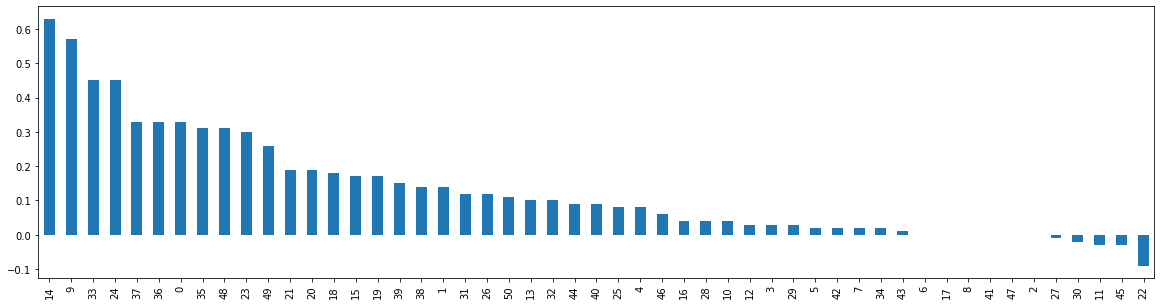

In [26]:
#r2df.set_index('catgorical variables',inplace=True)
r2df['r2log'].plot(kind='bar',figsize=(20,5))
plt.savefig('r2log1.png',bbox_inches='tight',dpi=600)

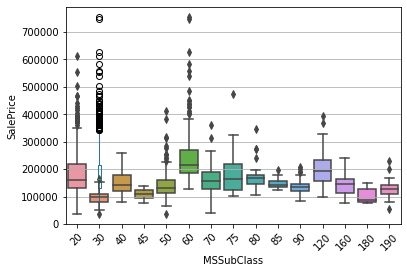

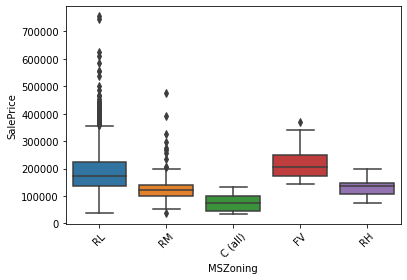

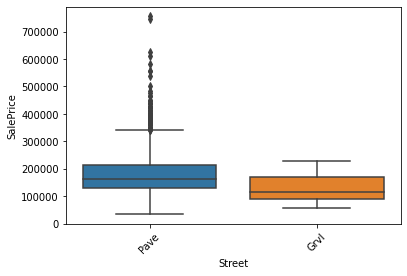

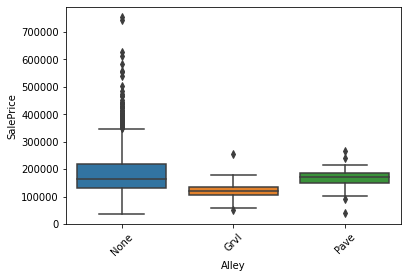

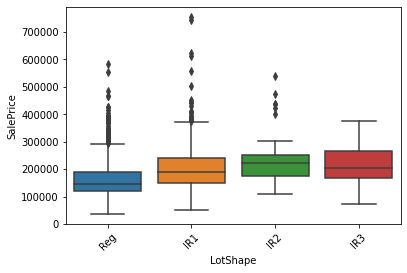

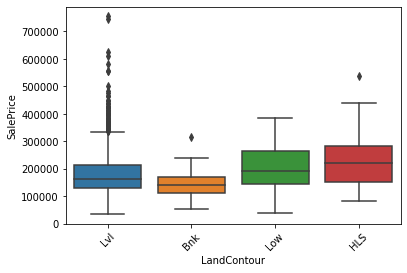

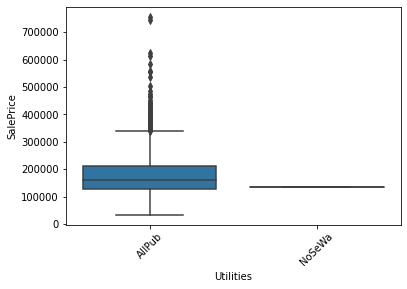

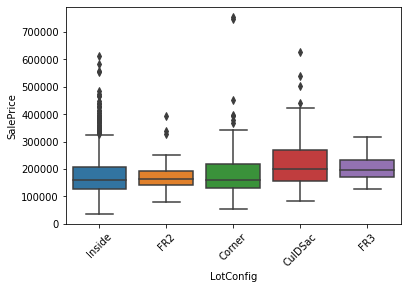

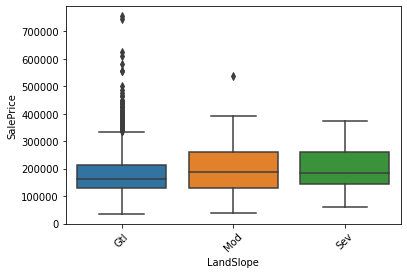

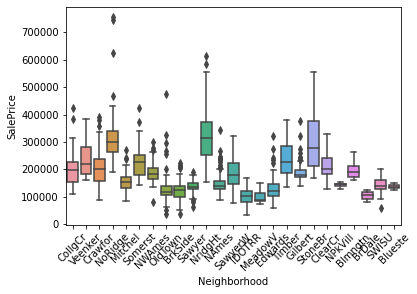

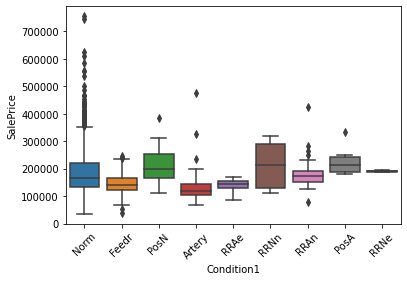

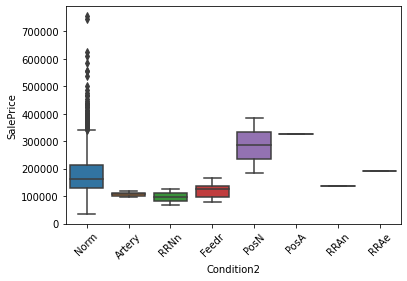

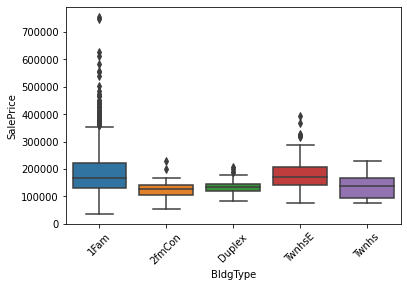

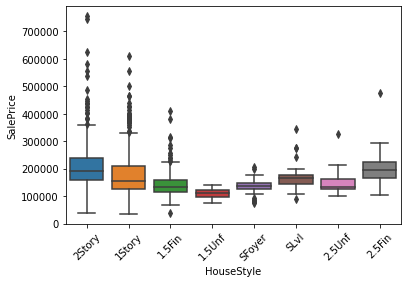

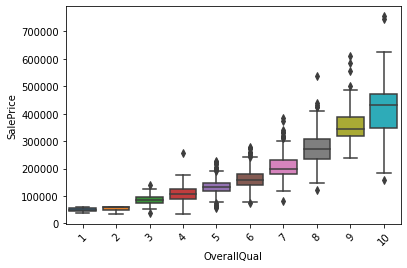

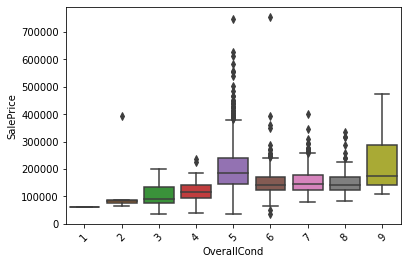

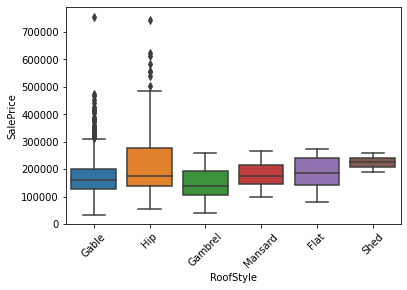

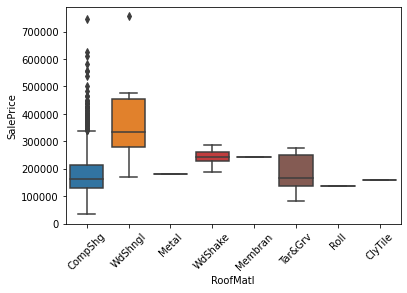

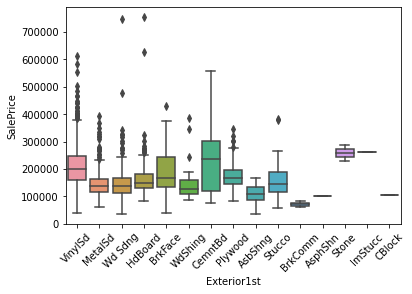

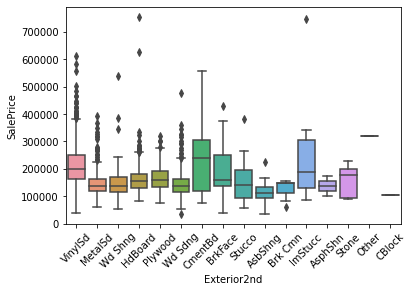

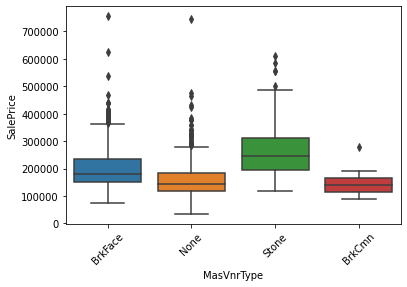

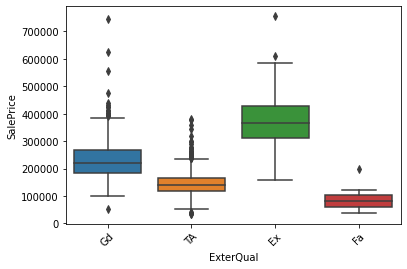

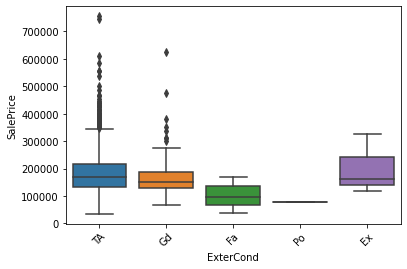

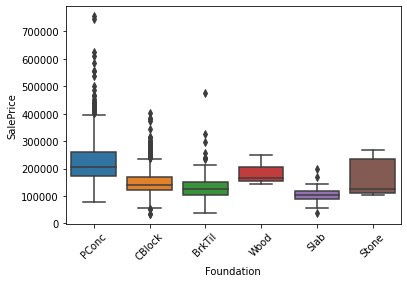

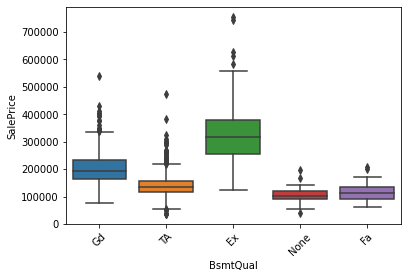

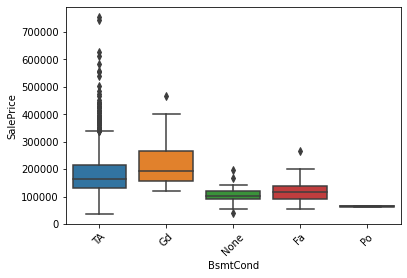

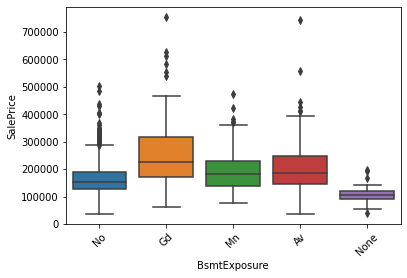

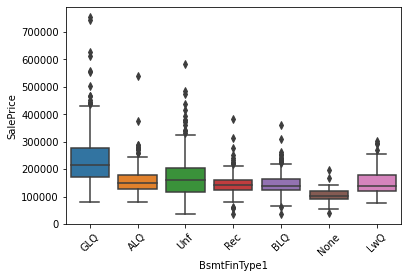

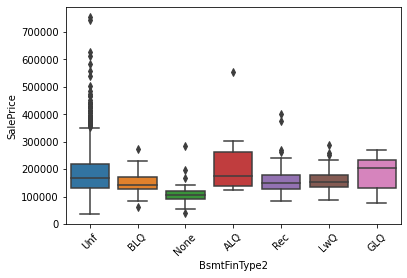

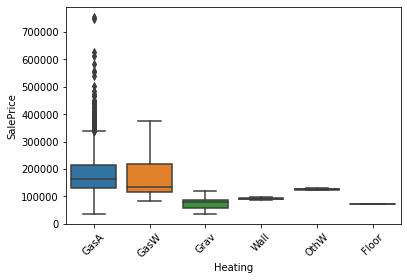

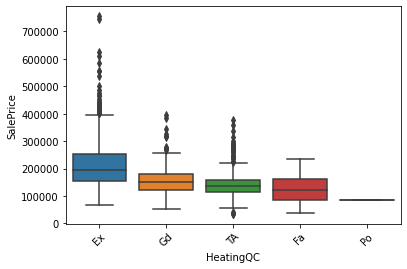

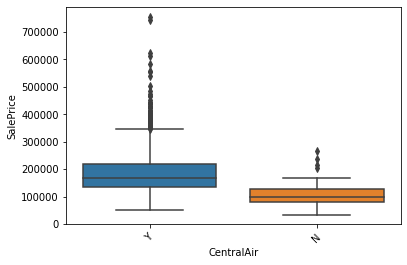

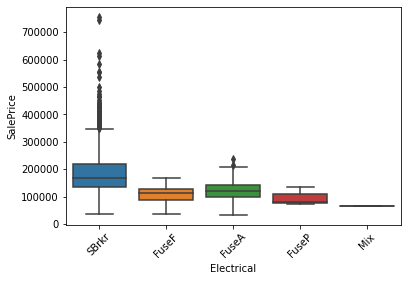

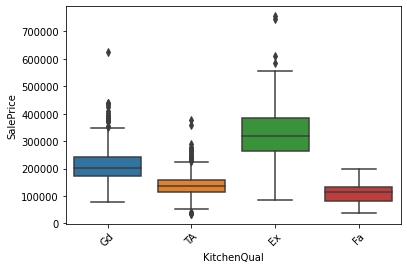

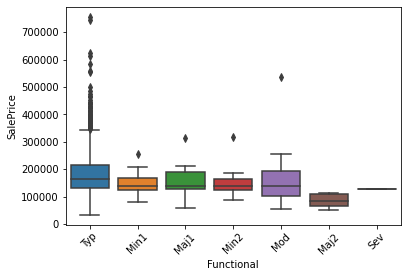

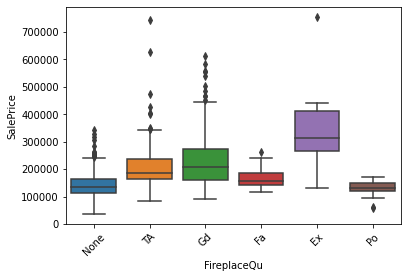

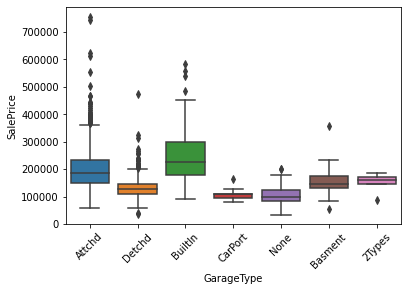

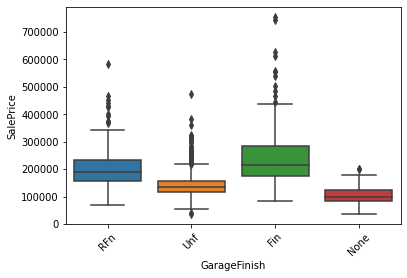

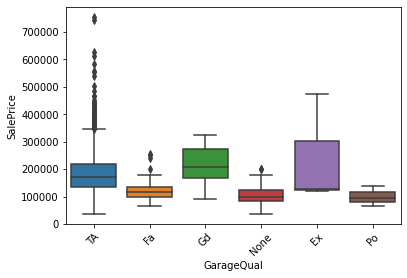

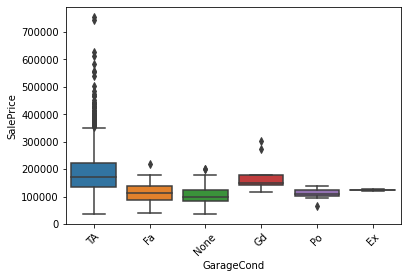

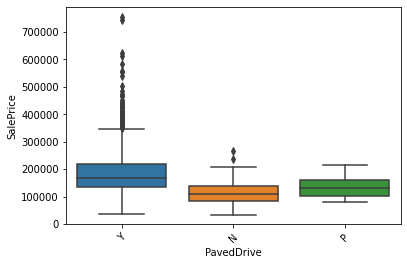

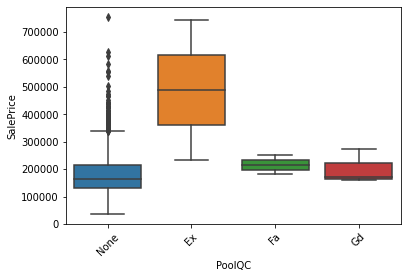

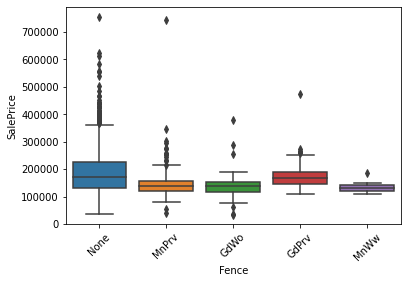

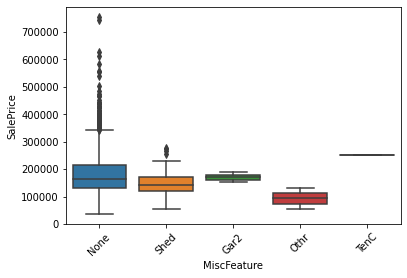

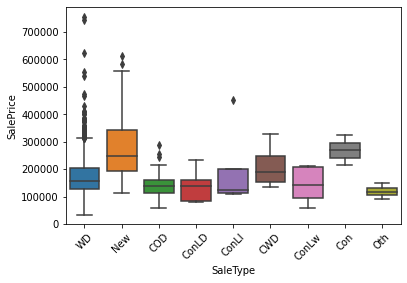

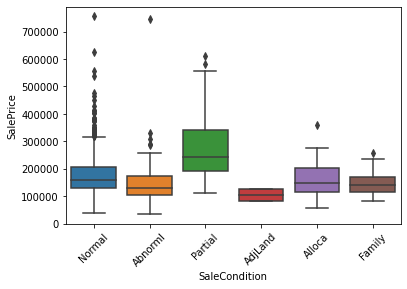

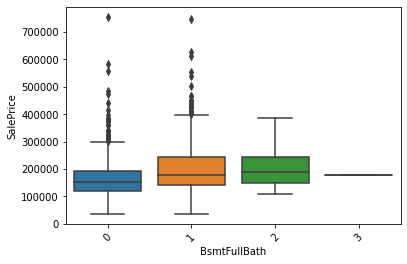

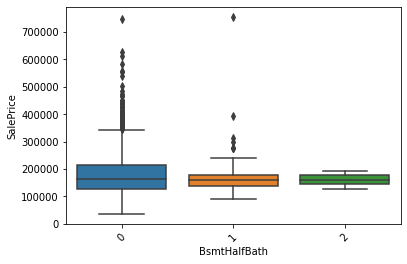

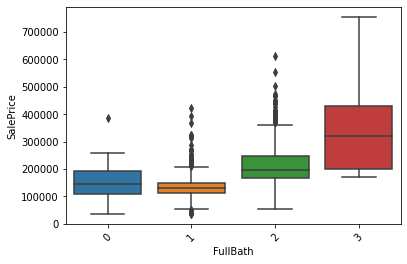

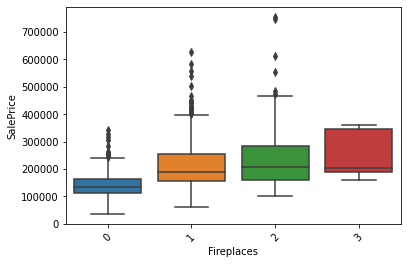

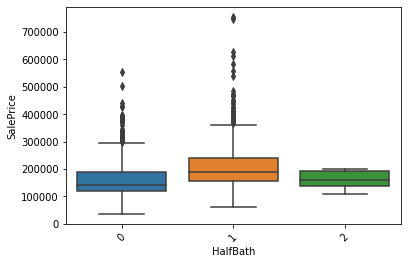

In [27]:
train.boxplot(column=['SalePrice'])
#


for i in categorical:
    ax=sns.boxplot(x=i,y='SalePrice',data=train)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    plt.show()



In [28]:
#sns.boxplot(x='GarageFinish',y='SalePrice',data=train)
#sns.boxplot(x='GarageType',y='SalePrice',data=train)

<a id='1.4'></a>
***

## **Linear Regression Analysis**

In [29]:
newcategorical=['OverallQual','Neighborhood','KitchenQual','BsmtQual','GarageFinish','GarageType','MSSubClass','FireplaceQu','FullBath','Foundation']


In [30]:
finalvar=newnumerical+newcategorical
finalvar.remove('SalePrice')


x=train[finalvar]
x=pd.get_dummies(x)
x=sm.add_constant(x)

y=train['SalePrice']
y_log=np.log10(train['SalePrice'])

rm1=sm.OLS(y, x).fit()
rm_log1=sm.OLS(y_log, x).fit()

rm_log1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     154.3
Date:                Sat, 28 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:43:49   Log-Likelihood:                 1979.3
No. Observations:                1460   AIC:                            -3835.
Df Residuals:                    1398   BIC:                            -3507.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2010      0.167      7.174      0.000       0.873       1.529
GrLivArea             7.251e-05    3.7e-05      1.958      0.050    -1.4e-07       0.000
1stFlrSF              3.232e-05    3.8e-05      0.849      0.396   -4.23e-05       0.000
YearBuilt                0.0002      0.000      1.546      0.122   -6.55e-05       0.001
YearRemodAdd             0.0008      0.000      6.883      0.000       0.001       0.001
MasVnrArea           -1.157e-06   1.17e-05     -0.099      0.921   -2.41e-05    2.18e-05
BsmtFinSF1            2.852e-05   4.62e-06      6.171      0.000    1.95e-05    3.76e-05
WoodDeckSF            6.005e-05   1.47e-05      4.079      0.000    3.12e-05    8.89e-05
2ndFlrSF              2.202e-05   3.77e-05      0.585      0.559   -5.18e-05    9.59e-05
OpenPorchSF           2.746e-05   2.85e-05      0.964      0.335   -2.84e-05    8.34e-05
OverallQual              0.0297      0.002     12.440      0.000       0.025       0.034
MSSubClass              -0.0003   5.21e-05     -4.949      0.000      -0.000      -0.000
FullBath                 0.0136      0.005      2.748      0.006       0.004       0.023
Neighborhood_Blmngtn     0.0406      0.019      2.176      0.030       0.004       0.077
Neighborhood_Blueste    -0.0030      0.045     -0.067      0.946      -0.091       0.085
Neighborhood_BrDale     -0.0293      0.019     -1.545      0.123      -0.066       0.008
Neighborhood_BrkSide     0.0440      0.011      3.999      0.000       0.022       0.066
Neighborhood_ClearCr     0.1021      0.014      7.425      0.000       0.075       0.129
Neighborhood_CollgCr     0.0592      0.011      5.433      0.000       0.038       0.081
Neighborhood_Crawfor     0.1088      0.011     10.088      0.000       0.088       0.130
Neighborhood_Edwards     0.0109      0.010      1.140      0.254      -0.008       0.030
Neighborhood_Gilbert     0.0469      0.012      3.775      0.000       0.023       0.071
Neighborhood_IDOTRR     -0.0331      0.012     -2.734      0.006      -0.057      -0.009
Neighborhood_MeadowV    -0.0353      0.018     -1.986      0.047      -0.070      -0.000
Neighborhood_Mitchel     0.0487      0.013      3.890      0.000       0.024       0.073
Neighborhood_NAmes       0.0469      0.008      5.525      0.000       0.030       0.063
Neighborhood_NPkVill     0.0278      0.023      1.229      0.219      -0.017       0.072
Neighborhood_NWAmes      0.0437      0.011      3.984      0.000       0.022       0.065
Neighborhood_NoRidge     0.1061      0.014      7.486      0.000       0.078       0.134
Neighborhood_NridgHt     0.1034      0.013      8.005      0.000       0.078       0.129
Neighborhood_OldTown     0.0059      0.009      0.642      0.521      -0.012       0.024
Neighborhood_SWISU       0.0354      0.015      2.422    

In [31]:
finalvar

['GrLivArea',
 '1stFlrSF',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'OverallQual',
 'Neighborhood',
 'KitchenQual',
 'BsmtQual',
 'GarageFinish',
 'GarageType',
 'MSSubClass',
 'FireplaceQu',
 'FullBath',
 'Foundation']

In [32]:
train['GarageFinish'].value_counts()

Unf     605
RFn     422
Fin     352
None     81
Name: GarageFinish, dtype: int64

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y_log, test_size=0.2, random_state=6)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

yhat = rm_log1.predict(X_test)
yhat

Train set: (1168, 70) (1168,)
Test set: (292, 70) (292,)


613     5.095073
1352    5.121352
767     5.241866
40      5.210601
983     5.393001
          ...   
1385    5.006448
836     5.082964
757     5.215963
892     5.178970
1336    5.152322
Length: 292, dtype: float64

Text(0, 0.5, 'logsalesprice')

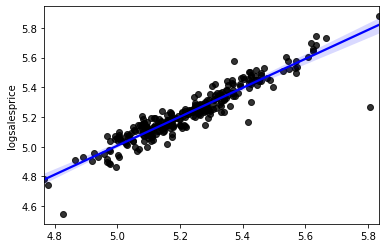

In [34]:
sns.regplot(x = yhat, y = y_test, data = None, scatter = True, scatter_kws={"color": "black"}, line_kws={"color": "blue"})
plt.ylabel("logsalesprice")

<AxesSubplot:>

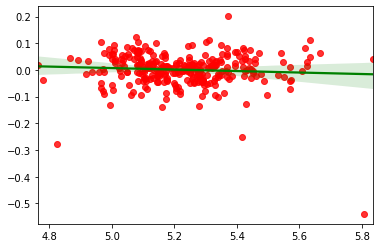

In [35]:
#plot predicted vs actual

sns.regplot(x = yhat, y = y_test-yhat, data = None, scatter = True, scatter_kws={"color": "red"}, line_kws={"color": "green"})

#fig.legend(labels = ('Actual','Predicted'),loc='upper left')
#presentation
#chart summary conclusion
#tableau or python

In [ ]:
# Save File
# train.to_csv('new_train',index=False

<a id='3'></a>

## **Summary and Conclusion**

- Nine highly correlating variables were investigated and used in the regression model
    -  GrLivArea and 1stFlrSF are the highest correlating numerical variables with price
    -  YearBuilt, YearRemodeled, MassVnrArea, and BsmtFinSF1 have only  slightly lower correlations
    - WoodDeckSF, 2ndFlrSF, and OpenPorchSF have even lower but still signficant correlations 
    - Garage Cars, Garage Area,  BsmntSF,  RmsAbvGrd, LotFrontageArea  have high correlations but also high cross correlations with GrLivArea

- Scatter plots of these nine variables all showed strong linear relationships with price

- 10 categorical variables showed a high relationship with price and were used in the regression model
     - OverallQual and  Neighborhood  ranked the highest
     - KitchenQual, BsmtQual, GarageFinish, GarageType, MSSubClass, FireplaceQu, FullBath, Foundation ranked closely afterwards

- Overall Quality shows a strong power relationship with SalesPrice, while in the other quality variables, Excellent shows higher prices, with the other identifiers having less effect

- Significant price differences exist across Neighborhoods;  Homes with built-in,Attached, Finished or Roughly Garages exhibit higher prices, although not as much as the difference by Neighborhoods

- Houses with three full baths show a significantly higher price as do particular MSSubClasses (dwelling type); foundation type shows less impact with Poured Concrete having the highest prices

- Taking the log of SalesPrice normalizes its long tail and leads to a better regression result; combined with dummy variables of the high-ranking categoricals yields an R2 of 0.87

- This regression model can be used as a first-pass screening tool to identify potentially undervalued properties as soon as they are listed, immediately sending a flag to the purchasing manager

